# Devoir 1 pour IFT6390 - Fondements de l'apprentissage machine

### Par Olivier Malenfant-Thuot
Matricule: 1012818

## Question 1: Small exercise on probabilities

In [1]:
cancer_proportion = 0.015
positive_if_healthy = 0.096
positive_if_sick = 0.87

total_positive = ( cancer_proportion * positive_if_sick + 
                  (1 - cancer_proportion) * positive_if_healthy )
sick_positive = ( cancer_proportion * positive_if_sick)

final_prob = sick_positive / total_positive
print(final_prob)

0.12127125731809309


La probabilité qu'une femme ait vraiment le cancer, même si son test est positif, est de seulement 12 %.

La bonne réponse est E).

## Question 2: Curse of dimensionality and geometric intuition in higher dimensions

#### 1.

Le volume d'un hypercube de dimension $d$ est

$V = c^d$,

où c est la longueur d'un côté.

#### 2.

Comme l'intégrale sur l'Univers de $p(x)$ doit être normalisée à 1, et que $p(x)$ est nul à l'extérieur de l'hypercube, nous savons que son intégrale vaut 1 à l'intérieur du cube.

Ensuite, comme la distribution est uniforme, la contibution de tout $x$ à l'intérieur du cube est la même.

$p(x) = \frac{1}{V} = \frac{1}{c^d}$

#### 3.

Comme la densité de probabilité est égale partout dans le grand hypercube, la probabilité $P_{small}$ qu'il soit généré dans le petit hypercube est égale au rapport de leur volume.

$P_{small} = \frac{V_{small} \times p_{small}(x)}{V_{large} \times p_{large}(x)} $

Avec $p_{small}(x) = p_{large}(x)$, 

$P_{small} = \frac{V_{small}}{V_{large}} = \frac{(0.94c)^d}{c^d} = 0.94^d$

et $P_{contour}$, la probabilité que le point soit dans le contour est

$P_{contour} = 1 - 0.94^d$.

#### 4.

In [2]:
dimensions = [1, 2, 3, 5, 10, 100, 1000]

for dim in dimensions:
    p_contour = 1. - 0.94**dim
    print('Pour un hypercube en ' + str(dim) + ' dimensions, la probabilité est de {:3.2f}%.'.format(p_contour*100))

Pour un hypercube en 1 dimensions, la probabilité est de 6.00%.
Pour un hypercube en 2 dimensions, la probabilité est de 11.64%.
Pour un hypercube en 3 dimensions, la probabilité est de 16.94%.
Pour un hypercube en 5 dimensions, la probabilité est de 26.61%.
Pour un hypercube en 10 dimensions, la probabilité est de 46.14%.
Pour un hypercube en 100 dimensions, la probabilité est de 99.79%.
Pour un hypercube en 1000 dimensions, la probabilité est de 100.00%.


#### 5.

En hautes dimensions, le nombre de degré de liberté fait qu'il est très rare pour un point de posséder des valeurs centrales dans toutes les dimensions. Dès qu'une seule valeur est près des extrêmes, le point se retrouve dans le contour. Il faut donc beaucoup plus de points pour bien échantilloner tout l'espace des probabilités.

## Parametric Gaussian density estimation, v.s. Parzen window density estimation

#### 1.

(a) Les paramètres à entraîner pour une gaussienne isotropique sont la moyenne $\mu$ et la covariance $\sigma$. Les deux sont de dimension 1.

(b) Les paramètres $\mu$ et $\sigma$ peuvent être obtenus par:

$\mu = \frac{1}{n} \sum_{i = 1}^{n} x_i$

$\sigma = \frac{1}{n} \sum_{i = 1}^{n} (x_i - \mu)(x_i - \mu)^T$,

pour $x_i \in D$.

(c) La complexité algorithmique est de 2, car c'est le nombre de paramètres libres à optimiser par l'apprentissage.

(d) $p(x) = \frac{1}{(2\pi)^{d/2}\sigma^d} e^{-\frac{\mid \mid x - \mu \mid \mid ^2}{2\sigma^2}}$

(e) La complexité algorithmique est de 1 cette fois, car seul $x$ varie d'un calcul à l'autre.

#### 2.

(a) La phase d'entraînement consiste à mettre en mémoire les valeurs en $d$ dimensions des $n$ points $x$ du dataset. 

(b) $\hat{p}_{Parzen}(x) = \frac{1}{n} \sum_{i = 1}^{n} \frac{1}{(2\pi)^{d/2}\sigma^d} e^{-\frac{\mid \mid x - x_i\mid \mid^2}{2\sigma^2}}$

(c) La complexité algorithmique est de 1. Seul $x$ varie d'un calcul à l'autre.

#### 3.

(a) La méthode des Parzen Windows a une plus grande capacité que la méthode des gaussiennes paramétriques. La méthode des gaussiennes force beaucoup de symétries dans l'espace des paramètres, alors qu'avec l'utilisation des Parzen Windows chaque point de l'espace est indépendant des autres lors du calcul de sa densité de probabilité.

(b) La méthode des Parzen Windows peut over-fitter les données si $\sigma$ est trop petit.

(c) Pour la méthode des gaussiennes, $\sigma$ est un paramètre qui est appris par le modèle, et donc qui dépend des données du training set. Par contre, pour les Parzen windows, $\sigma$ est choisi par l'utilisateur et ne dépend donc pas des valeurs présentes dans le training set.

#### 4.

(a) Une gaussienne diagonale peut être exprimé par la fonction

$f(x) = \frac{1}{(2\pi)^{d/2}\sqrt{|\Sigma|}} e^{-\frac{1}{2} (x - \mu) \Sigma^{-1} (x - \mu)^T}$,

où $x$ et $\mu$ sont des vecteurs de dimension d

et $\Sigma$ est une matrice carrée de taille d par d.

(b) Si les composantes du vecteur sont générées aléatoirement dans chacune des dimensions, selon leur propre distribution gaussienne, les variances dans chaque dimension seront indépendantes. La matrice de covariance de la gaussienne aura alors la forme diagonale suivante:

$\Sigma = \begin{bmatrix} \sigma_1^2 & & & \Large{0} \\ & \sigma_2^2\\ & & ...\\ \Large{0} & & & \sigma_d^2\end{bmatrix}$

où les $\sigma$ sont indépendants et qui correspond à la matrice de covariaince d'une gaussienne diagonale.

(c) Le risque empirique à minimiser est

$\hat{R}(p(x),D) = -\frac{1}{\mid D\mid} \sum\limits_{x\in D}\log(p(x))$.

Et donc la fonction qui minimise ce risque est donnée par

$\hat{p}(D_{train}) = \text{argmin}(-\frac{1}{\mid D\mid} \sum\limits_{x\in D}\log(p(x)))$.

Avec la forme du (a) pour $p(x)$, nous obtenons

$\hat{p}(D_{train}) = \text{argmin}(-\frac{1}{|D|} \sum\limits_{x\in D}\log(\frac{1}{(2\pi)^{d/2}\sqrt{|\Sigma|}} e^{-\frac{1}{2} (x - \mu) \Sigma^{-1} (x - \mu)^T}))$

(d) Les minimums de la fonction $\hat{R}(\hat{p}(x),(D_{train})$ se trouveront lorsque $\frac{\partial \hat{p}}{\partial \mu \partial \sigma} = 0$.

$\frac{\partial \hat{p}}{\partial \mu \partial \sigma} = \frac{\partial}{\partial \sigma}(\frac{\partial}{\partial \mu} (-\frac{1}{|D|} \sum_x (\log(\frac{1}{(2\pi)^d/2 \sqrt{|\Sigma|}}) - (\frac{1}{2}(x-\mu) \Sigma^{-1}(x-\mu)^T)))$

Résolvons chaque dérivé séparément. Pour la dérivé en $\mu$, nous pouvons enlever le premier terme:

$\frac{\partial}{\partial \sigma}(\frac{\partial}{\partial \mu} ( \sum_x (x-\mu) \Sigma^{-1}(x-\mu)^T))$

$\frac{\partial}{\partial \sigma}(\frac{\partial}{\partial \mu} ( \sum_x \sum_{i=1}^D (\frac{x_i - \mu_i}{\sigma_i})^2)) = \frac{\partial}{\partial \sigma} \sum_x \sum_{i=1}^D (\frac{-2 (x_i - \mu_i)}{\sigma_i^2}) = \sum_x \sum_{i=1}^D \frac{4 (x_i - \mu_i)}{\sigma_i^3}$

Donc les minimums de $\hat{R}(\hat{p}(x),(D_{train})$ se trouvent lorsque $\sum_x \sum_{i=1}^D \frac{4 (x_i - \mu_i)}{\sigma_i^3} = 0$.


## Practical part: density estimation

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

1. Gaussian density estimator

In [11]:
class Gaussian_density_estimator:
    
    def train(self, data):
        if data.ndim == 1:
            data = np.transpose(np.array([data]))
        self.ndim = np.min(np.shape(data))
        self.mu = np.zeros(self.ndim)
        self.sigma = np.zeros(self.ndim)
        self.mu = 1./np.shape(data)[0] * np.sum(data, axis = 0)
        for dim in range(self.ndim):
            self.sigma[dim] = (1./np.shape(data)[0] * np.matmul((data[:,dim] - self.mu[dim]),
                                np.transpose(data[:,dim] - self.mu[dim])))
                        
    def predict(self, x):
        prediction = np.zeros(self.ndim)
        prefactor = 1./((2*np.pi)**(self.ndim/2) * np.sqrt(np.sum(self.sigma)**2))
        prediction = (prefactor * np.exp(-1./2 * np.matmul((x - self.mu) *
                                self.sigma**(-2), np.transpose(x - self.mu))))
        return prediction

In [15]:
class Parzen_window:
    
    def __init__(self, sigma = 0.5):
        self.sigma = sigma
    
    def train(self, data):
        if data.ndim == 1:
            data = np.transpose(np.array([data]))
        self.data = data
        self.ndim = np.shape(data)[1]
        self.ndata = np.shape(data)[0]
        
    def predict(self, x):
        kernel_results = np.zeros(self.ndata);
        for i in range(self.ndata):
            kernel_results[i] = self.kernel(self.data[i], x)
        prediction = (1. / self.ndata) * np.sum(kernel_results)
        return prediction
        
    def kernel(self, datapoint, x):
        K = (1. / ((2*np.pi)**(self.ndim/2) * self.sigma**self.ndim) *
            np.exp(- np.sum((datapoint - x)**2 ) / self.sigma**2 ) )
        return K

3. 1D Densities

In [5]:
iris = datasets.load_iris()
data = iris.data
target = iris.target

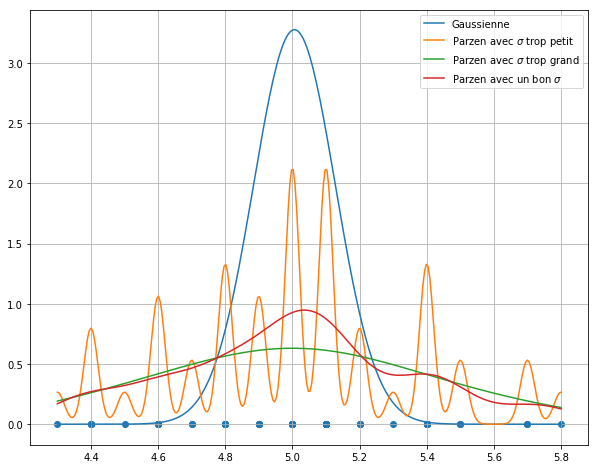

In [16]:
data_1d = data[np.where(target == 0)][:,0]

gauss_1d = Gaussian_density_estimator()
gauss_1d.train(data_1d)

parzen_1d_small = Parzen_window(sigma = 0.03)
parzen_1d_small.train(data_1d)
parzen_1d_large = Parzen_window(sigma = 0.4)
parzen_1d_large.train(data_1d)
parzen_1d_good = Parzen_window(sigma = 0.14)
parzen_1d_good.train(data_1d)

x = np.linspace(np.min(data_1d),np.max(data_1d),300)
predictions_gauss = np.zeros(len(x))
predictions_parzen_small = np.zeros(len(x))
predictions_parzen_large = np.zeros(len(x))
predictions_parzen_good = np.zeros(len(x))
for point in range(len(x)):
    predictions_gauss[point] = gauss_1d.predict(x[point])
    predictions_parzen_small[point] = parzen_1d_small.predict(x[point])
    predictions_parzen_large[point] = parzen_1d_large.predict(x[point])
    predictions_parzen_good[point] = parzen_1d_good.predict(x[point])
        
fig, ax = plt.subplots(figsize = (10, 8))
ax.scatter(data_1d,np.zeros(len(data_1d)))
ax.grid(True)

ax.plot(x, predictions_gauss, label='Gaussienne') 
ax.plot(x, predictions_parzen_small, label='Parzen avec $\sigma$ trop petit')
ax.plot(x, predictions_parzen_large, label='Parzen avec $\sigma$ trop grand')
ax.plot(x, predictions_parzen_good, label='Parzen avec un bon $\sigma$')
ax.legend()

(f) Je me suis basé sur le sigma trouvé par la méthode des gaussiennes pour avoir un point de départ et j'ai fait quelques tests autour de cette valeur afin de limiter les fluctuations locales proches des points du dataset.

4. 2D Densities

In [7]:
data_2d = data[np.where(target == 1)][:,0:2]

gauss_2d = Gaussian_density_estimator()
gauss_2d.train(data_2d)

parzen_2d_small = Parzen_window(sigma = 0.07)
parzen_2d_small.train(data_2d)
parzen_2d_large = Parzen_window(sigma = 0.7)
parzen_2d_large.train(data_2d)
parzen_2d_good = Parzen_window(sigma = 0.25)
parzen_2d_good.train(data_2d)

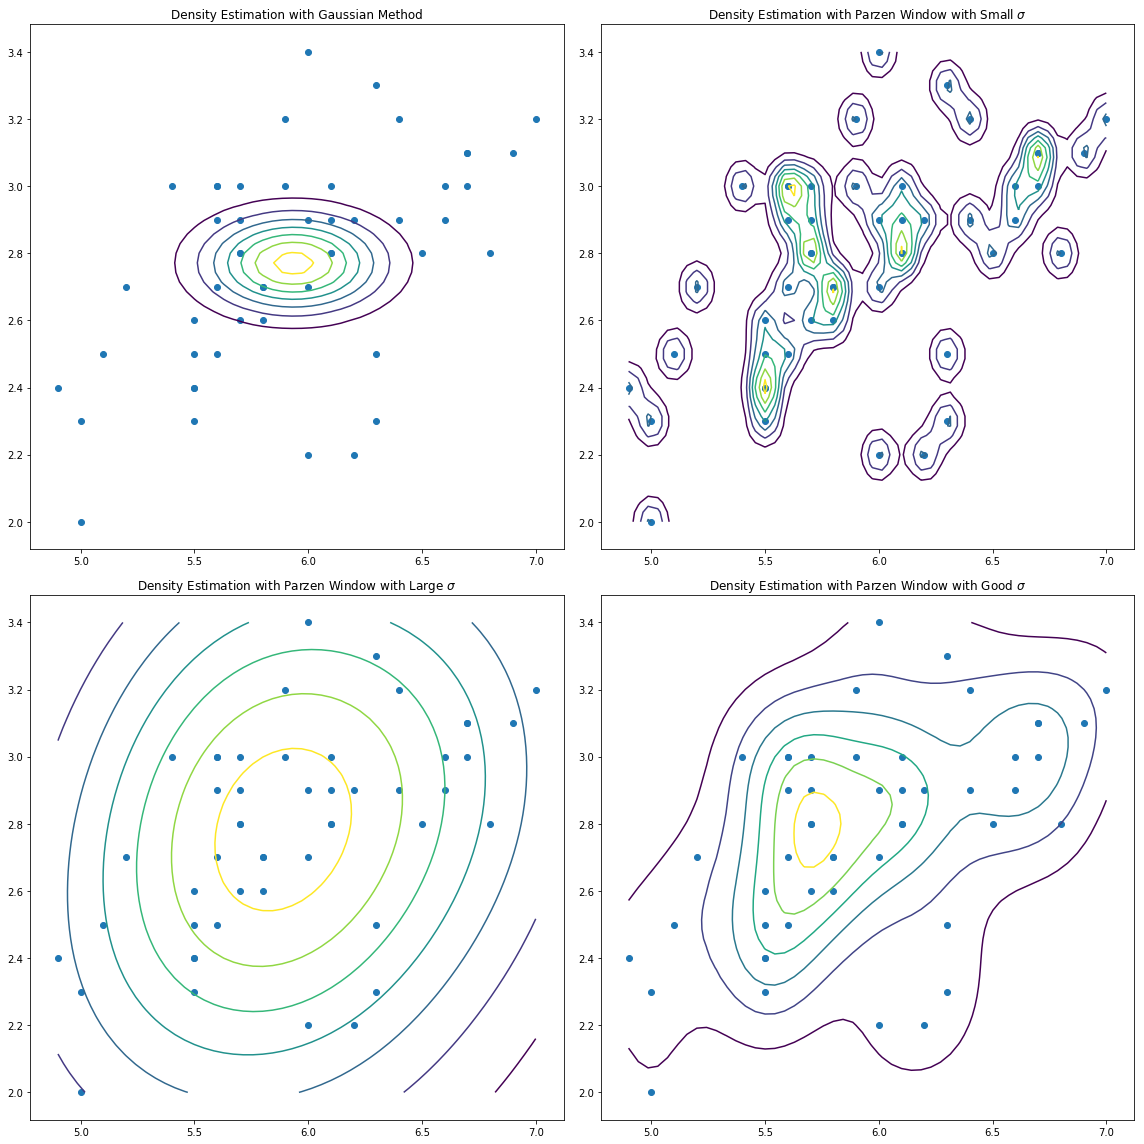

In [8]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (16,16))
ax1, ax2, ax3, ax4 = ax.flatten()

npoints = 50
xside = np.linspace(np.min(data_2d[:,0]), np.max(data_2d[:,0]), npoints)
yside = np.linspace(np.min(data_2d[:,1]), np.max(data_2d[:,1]), npoints)

predictions_gauss = np.zeros((npoints,npoints))
predictions_parzen_small = np.zeros((npoints,npoints))
predictions_parzen_large = np.zeros((npoints,npoints))
predictions_parzen_good = np.zeros((npoints,npoints))

for i,y in enumerate(yside):
    for j,x in enumerate(xside):
        predictions_gauss[i][j] = gauss_2d.predict([x,y])
        predictions_parzen_small[i][j] = parzen_2d_small.predict([x,y])
        predictions_parzen_large[i][j] = parzen_2d_large.predict([x,y])
        predictions_parzen_good[i][j] = parzen_2d_good.predict([x,y])

ax1.contour(xside,yside,predictions_gauss)
ax1.scatter(data_2d[:,0], data_2d[:,1])
ax1.set_title('Density Estimation with Gaussian Method')

ax2.contour(xside,yside,predictions_parzen_small)
ax2.scatter(data_2d[:,0], data_2d[:,1])
ax2.set_title('Density Estimation with Parzen Window with Small $\sigma$')

ax3.contour(xside,yside,predictions_parzen_large)
ax3.scatter(data_2d[:,0], data_2d[:,1])
ax3.set_title('Density Estimation with Parzen Window with Large $\sigma$')

ax4.contour(xside,yside,predictions_parzen_good)
ax4.scatter(data_2d[:,0], data_2d[:,1])
ax4.set_title('Density Estimation with Parzen Window with Good $\sigma$')

fig.tight_layout()

(e) J'ai commencé avec les mêmes valeurs que précédemment, mais en plus hautes dimensions, il m'a fallu augmenter les valeurs de $\sigma$, car les deux graphiques du bas étaient overfit.